# Klassifizierung: Banknoten

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# DataFrame erstellen
- `variance`: Varianz der Wavelet-Transformierten Bilder
- `skewness`: Schiefe der Wavelet-Transformierten Bilder
- `curtosis`: Wölbung der Wavelet-Transformierten Bilder
- `entropy`: Entropie des Bildes
- `class`: Klasse (0: gefälscht, 1: echt)

In [3]:
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df = pd.DataFrame(data)
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.dropna()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
dublicate_data = df.copy() # Daten kopieren
data.drop_duplicates(subset=None,inplace=True) # Duplikate rauswerfen
print(dublicate_data.shape)
print(data.shape)

(1372, 5)
(1348, 5)


c:\Users\Marcel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


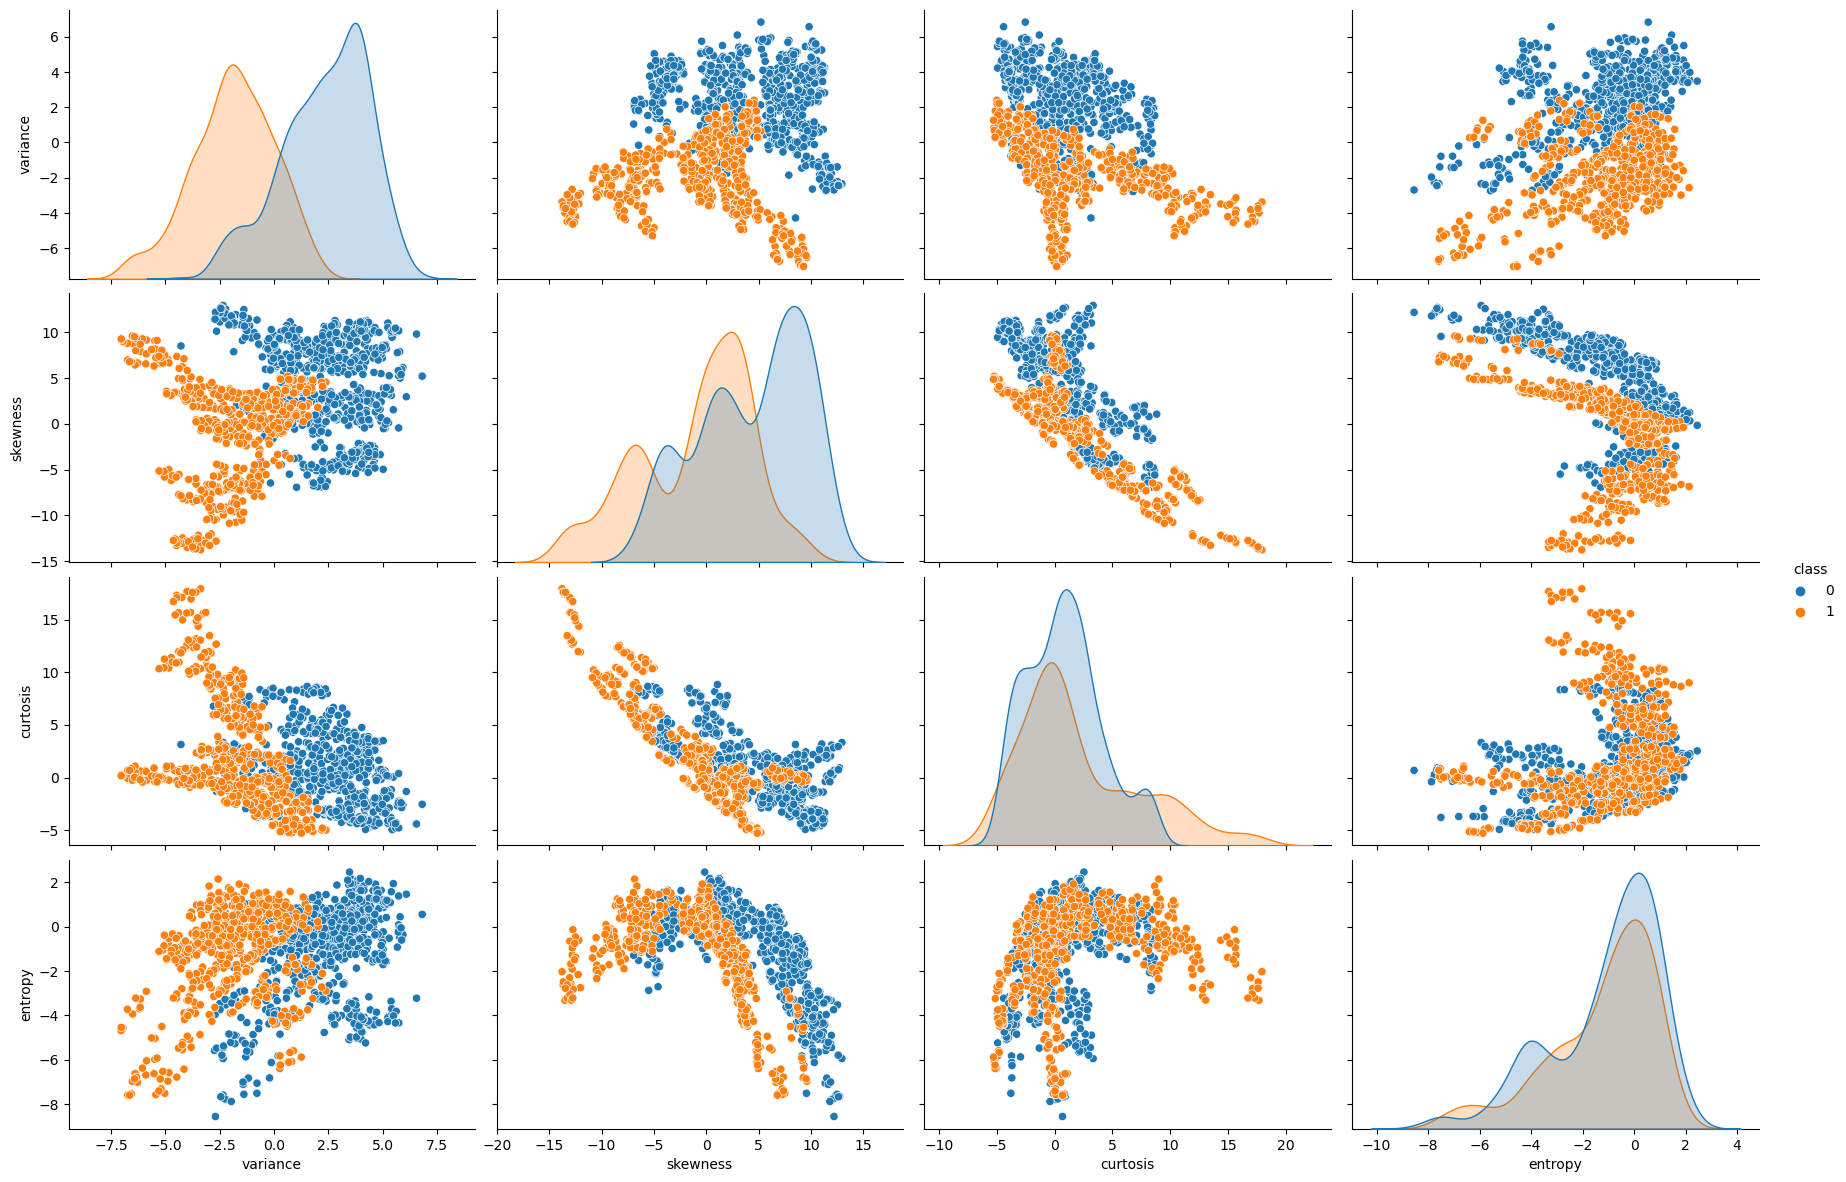

In [7]:
# pairplot for the data
sns.pairplot(data=data,hue='class',height=3,aspect=1.5)
plt.show()

In [8]:
y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

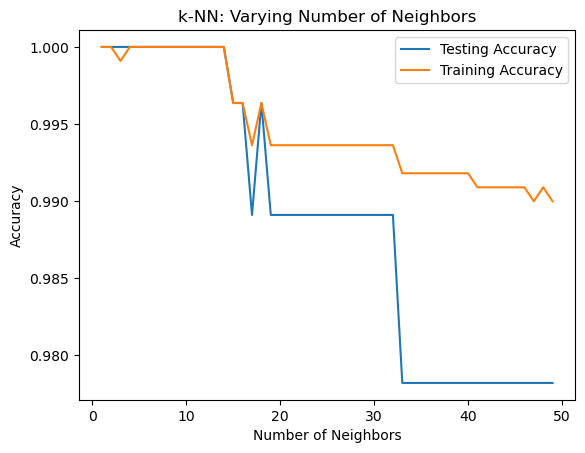

In [9]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Mit einer for-Schleife die Accuracy für verschiedene k testen
for i, k in enumerate(neighbors):
    # k-NN Classifier mit k Nachbarn erstellen
    knn = KNeighborsClassifier(n_neighbors=k)

    # Klassefizierer mit Trainingsdaten trainieren
    knn.fit(X_train, y_train)
    
    # Genauigkeit auf Trainingsdaten speichern
    train_accuracy[i] = knn.score(X_train, y_train)

    # Genauigkeit auf Testdaten speichern
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot generieren
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
import sklearn.metrics as sm
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

X_new = np.array([[-1.8439,-8.6475,7.6796,-0.66682]])


print(sm.classification_report(y_test, y_pred))



new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Prediction: [1]


Predicted,0,1
Actual,,
0,153,0
1,0,122
